In [1]:
library(Seurat)
library(data.table)
library(ggplot2)
library(flexclust)

Registered S3 method overwritten by 'R.oo':
  method        from       
  throw.default R.methodsS3
Loading required package: grid
Loading required package: lattice
Loading required package: modeltools
Loading required package: stats4


# analysis

In [2]:
datasetName = "/stor/public/hcad/lung_lung_Braga2019/lung_lung_Braga2019"

In [4]:
# Load the organized dataset
system(paste0("tar -zxvf ", datasetName, "_expression.tar.gz")) #Invoke the unix command
data.matrix <- Read10X(data.dir = "/home/chenyx/hca-d/lung/lung_lung_Braga2019_expression")

In [5]:
# Load the metadata and annotation
data.metadata <- read.table(file = paste0(datasetName,"_metadata.tsv"), h = T, sep = "\t", row.names = 5)
data.annotation <- read.table(file = paste0(datasetName,"_annotation.tsv"), h = T, sep = "\t", row.names = 1)

In [23]:
# Modify the default value of these parameters according to original paper
dataobj <- CreateSeuratObject(counts = data.matrix, project = datasetName, meta.data = data.metadata)
dataobj <- AddMetaData(dataobj, metadata = data.annotation)
if (file.exists(paste0(datasetName,"_annotation2.tsv"))) {
    dataobj <- AddMetaData(dataobj, metadata = data.annotation2)
}

In [24]:
dataobj[["percent.mt"]] <- PercentageFeatureSet(dataobj, pattern = "^[Mm][Tt]")#  no gene names

In [26]:
# Pre-processing
min.cells = 3
min.features = 200
nFeature_RNA_range = c(1000, 60000)
percent.mt.thre = 3

In [27]:
#QC
dataobj <- subset(dataobj, subset = nFeature_RNA > nFeature_RNA_range[1] & nFeature_RNA < nFeature_RNA_range[2] & percent.mt < percent.mt.thre)

In [29]:
# 2. run sctransform 
dataobj <- SCTransform(dataobj, vars.to.regress = "percent.mt", do.correct.umi = TRUE, do.scale = TRUE, do.center = TRUE)

Calculating cell attributes for input UMI matrix
Variance stabilizing transformation of count matrix of size 15293 by 922
Model formula is y ~ log_umi
Get Negative Binomial regression parameters per gene
Using 2000 genes, 922 cells


  |                                                                      |   0%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 33.939392”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 33.970590”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 20.952381”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 14.933333”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 16.941177”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 9.777778”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 0.500000”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 29.807692”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 33.870968”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 15.785714”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 197.508480”Warning message in dpois(y, mu, log = TRUE):
“non-int

  |=========                                                             |  12%

Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 0.500000”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 0.500000”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 0.500000”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 0.500000”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 0.500000”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 0.500000”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 0.500000”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 0.500000”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 0.500000”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 0.000001”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 0.500000”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 0.500000”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 0.500000”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 0.500000”Warnin

  |==================                                                    |  25%

Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 0.250000”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 0.500000”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 0.500000”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 0.500000”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 0.500000”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 0.066667”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 0.066667”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 0.066667”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 0.066667”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 0.066667”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 0.066667”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 0

  |==========================                                            |  38%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 0.500000”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 0.500000”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 1.043478”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 2.076923”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 4.121212”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 1.125000”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 3.142857”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 1.040000”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 3.272727”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 1.034483”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 1.080000”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 2.068965”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 1.153846

  |===================================                                   |  50%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 2.068965”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 1.062500”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 8.073395”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 3.031915”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 6.085714”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 1.021739”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 7.070000”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 1.037037”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 1.037037”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 5.090909”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 1.032258”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 12.250000”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 1.02272

  |============================================                          |  62%

Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 0.500000”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 0.500000”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 0.500000”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 0.500000”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 0.500000”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 7.875000”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 7.777778”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 22.916666”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = f

  |====================================================                  |  75%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 8.888889”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 17.894737”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 11.916667”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 8.888889”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 0.500000”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 18.888890”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 3.750000”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 5.833333”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 4.800000”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 3.750000”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 4.800000”Warning message in dpois(y, mu, log = TRUE):
“non-integer x 

  |=============================================================         |  88%

Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 0.500000”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 0.500000”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 0.500000”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 0.500000”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 0.500000”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 0.500000”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 0.500000”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 0.500000”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 0.500000”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 0.500000”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 0.333333”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 0.500000”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 0.500000”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached

  |======================================================================| 100%


Second step: Get residuals using fitted parameters for 15293 genes


  |======================================================================| 100%


Computing corrected count matrix for 15293 genes


  |======================================================================| 100%


Calculating gene attributes
Wall clock passed: Time difference of 1.19341 mins
Determine variable features
Set 3000 variable features
Place corrected count matrix in counts slot
Regressing out percent.mt
Centering and scaling data matrix
Set default assay to SCT


PC_ 1 
Positive:  ENSG00000164972, ENSG00000124237, ENSG00000105519, ENSG00000183644, ENSG00000117472, ENSG00000188817, ENSG00000186973, ENSG00000160188, ENSG00000159713, ENSG00000166959 
	   ENSG00000173947, ENSG00000179902, ENSG00000168589, ENSG00000160345, ENSG00000203985, ENSG00000135205, ENSG00000152611, ENSG00000197748, ENSG00000034239, ENSG00000172361 
	   ENSG00000147400, ENSG00000154080, ENSG00000155761, ENSG00000111834, ENSG00000174844, ENSG00000179813, ENSG00000231738, ENSG00000277639, ENSG00000188659, ENSG00000215217 
Negative:  ENSG00000205542, ENSG00000087086, ENSG00000204287, ENSG00000034510, ENSG00000019582, ENSG00000011600, ENSG00000196126, ENSG00000196154, ENSG00000026025, ENSG00000216490 
	   ENSG00000158869, ENSG00000169442, ENSG00000234745, ENSG00000019169, ENSG00000231389, ENSG00000130208, ENSG00000167996, ENSG00000197746, ENSG00000166710, ENSG00000173372 
	   ENSG00000260314, ENSG00000162511, ENSG00000223865, ENSG00000268173, ENSG00000030582, ENSG00000165140, ENS

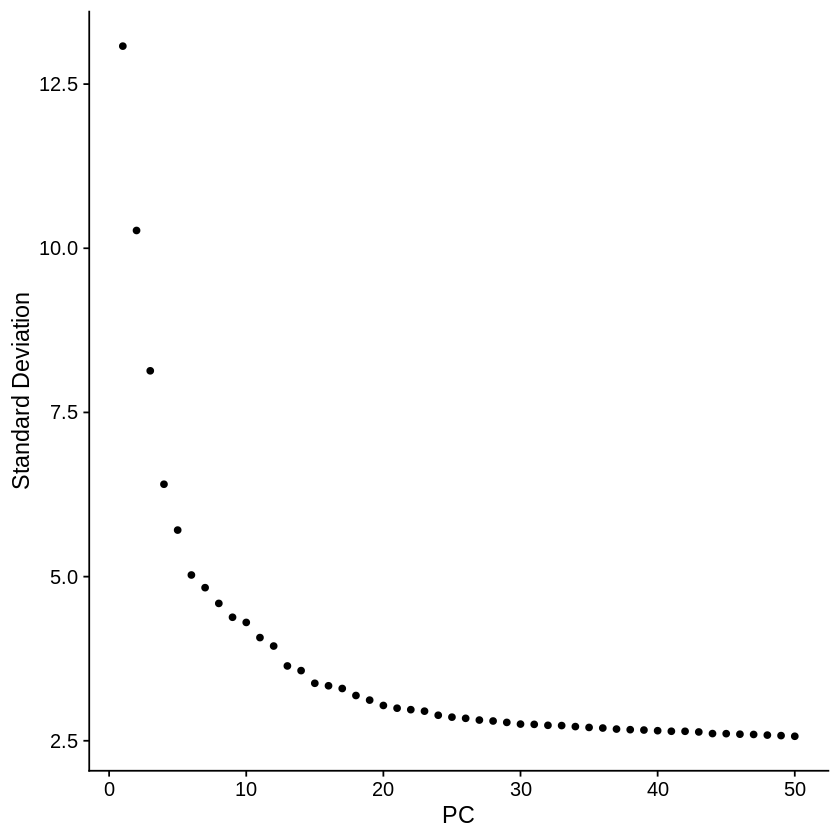

In [30]:
# Dimensional Reduction
dataobj <- RunPCA(dataobj, features = VariableFeatures(object = dataobj))
ElbowPlot(dataobj,50)

In [31]:
pcDim = 50
dataobj <- RunUMAP(dataobj, dims = 1:pcDim)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”16:45:45 UMAP embedding parameters a = 0.9922 b = 1.112
16:45:45 Read 922 rows and found 50 numeric columns
16:45:45 Using Annoy for neighbor search, n_neighbors = 30
16:45:45 Building Annoy index with metric = cosine, n_trees = 50
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
16:45:45 Writing NN index file to temp file /tmp/Rtmp3XgSsz/file3ca22479dd6c
16:45:45 Searching Annoy index using 1 thread, search_k = 3000
16:45:45 Annoy recall = 100%
16:45:46 Commencing smooth kNN distance calibration using 1 thread
16:45:46 Initializing from normalized Laplacian + noise
16:45:46 Commencing optimization

In [39]:
# Cluster the cells
dataobj <- FindNeighbors(dataobj, reduction = "pca", dims = 1:pcDim, nn.eps = 0.5)
dataobj <- FindClusters(dataobj, resolution = 1, n.start = 10)
#randIndex(dataobj$cell_cluster,dataobj$seurat_clusters)

Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 922
Number of edges: 39917

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7631
Number of communities: 9
Elapsed time: 0 seconds


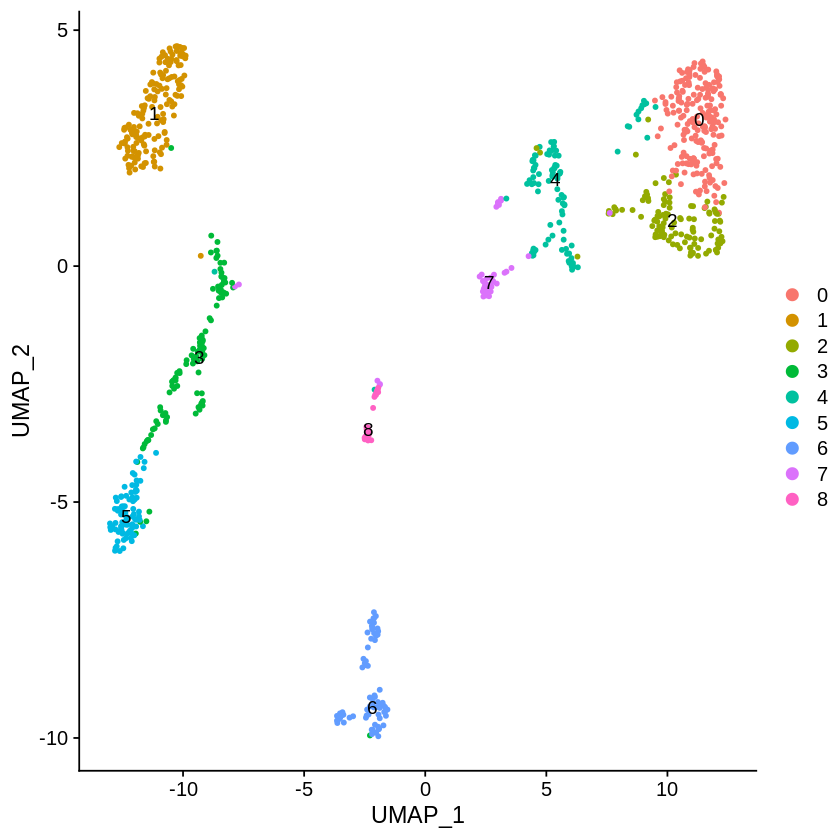

In [40]:
p_umap2 <- DimPlot(dataobj, reduction = "umap", label = TRUE, pt.size=1)
p_umap2

In [41]:
ggsave(paste0(datasetName,".seurat.umap.tiff"), plot = p_umap2, width = 8, height = 5)

In [42]:
# Finding cluster markers 
dataobj.markers <- FindAllMarkers(dataobj, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)

Calculating cluster 0
Calculating cluster 1
Calculating cluster 2
Calculating cluster 3
Calculating cluster 4
Calculating cluster 5
Calculating cluster 6
Calculating cluster 7
Calculating cluster 8


In [43]:
write.table(dataobj.markers, file = paste0(datasetName,".seurat.markers.txt"), sep = "\t", quote = F, row.names = F, col.names = T)
saveRDS(dataobj, file = paste0(datasetName,".seuratobj.rds"))

# Annotation

In [3]:
dataobj <- readRDS(paste0(datasetName,".seuratobj.rds"))
# Load marker file
dataobj.markers <- read.table(file = paste0(datasetName,".seurat.markers.txt"), h = T, sep = "\t")

In [6]:
library("org.Hs.eg.db")
FindGeneName <- function(IDs){
    k = keys(org.Hs.eg.db,keytype = "ENSEMBL")
    g2e = select(org.Hs.eg.db,keys=k,columns = c("ENTREZID","SYMBOL"), keytype="ENSEMBL")
    Genes = list()
    for(i in IDs){
        i = strsplit(i,split='[.]')[[1]][1] #[.] is very important
        gene = g2e[g2e$'ENSEMBL'== i,'SYMBOL']
        if(length(gene) == 0){ # why this situation happen
            Genes = append(Genes,'NA')
        }
        else{
            Genes = append(Genes,gene[1])# why sometimes a ID find mutiple gene?
        }
    }
    return(Genes)
}

Loading required package: AnnotationDbi
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min

Loading required package: Biobase
Welcome to Bioconductor

    Vignettes c

In [7]:
dataobj.markers$ensemble_ID <- dataobj.markers$gene
dataobj.markers$gene <- unlist(FindGeneName(dataobj.markers$ensemble_ID))

'select()' returned 1:many mapping between keys and columns


In [8]:
write.table(dataobj.markers, file = paste0(datasetName,".seurat.markers.txt"), sep = "\t", quote = F, row.names = F, col.names = T)

In [35]:
dataobj.markers[dataobj.markers$cluster==8,]

,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene,ensemble_ID
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<fct>
2243,1.069081e-77,0.7474667,0.609,0.009,1.634945e-73,8,ERG,ENSG00000157554
2244,1.593586e-77,0.7035913,0.609,0.009,2.437071e-73,8,CLDN5,ENSG00000184113
2245,5.858741e-76,1.5531216,0.652,0.012,8.959773e-72,8,MMRN1,ENSG00000138722
2246,7.035542e-66,0.4943357,0.522,0.008,1.075945e-61,8,RAMP2,ENSG00000131477
2247,1.192773e-58,0.8046874,0.478,0.008,1.824107e-54,8,CCL14,ENSG00000276409
2248,1.997672e-54,0.9357597,0.652,0.023,3.055040e-50,8,ECSCR,ENSG00000249751
2249,3.416765e-53,1.3610083,0.478,0.010,5.225258e-49,8,LYVE1,ENSG00000133800
2250,3.080754e-52,1.9359872,0.913,0.066,4.711397e-48,8,GNG11,ENSG00000127920
2251,1.831983e-51,0.7068971,0.435,0.008,2.801652e-47,8,PROX1,ENSG00000117707


In [39]:
dataobj.markers[dataobj.markers$gene=="ADGRF5",]

,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene,ensemble_ID
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<fct>
325,8.405003e-73,0.8755607,0.848,0.181,1.285377e-68,1,ADGRF5,ENSG00000069122
2479,9.649429e-03,0.3622944,0.565,0.293,1.000000e+00,8,ADGRF5,ENSG00000069122


In [4]:
new.cluster.ids <- c('Lung-Connective Tissue-Macrophage-FABP4 C1QB',
                     'Lung-Epithelial Tissue-Type II alveolar cell-NAPSA SFTPA2',
                     'Lung-Connective Tissue-Macrophage-FABP4 C1QB',
                     'Lung-Epithelial Tissue-Type I alveolar cell-CAV2 AQP4',
                     'Lung-Connective Tissue-Dendritic cell-HLA-DRA IL1B',
                     'Lung-Epithelial Tissue-Ciliated columnar cell-C11orf88 SNTN',
                     'Lung-Connective Tissue-Fibrocyte-DCN COL1A2',
                     'Lung-Connective Tissue-Mast cell-TPSAB1 MS4A2',
                     'Lung-Epithelial Tissue-Endothelial cell-CLDN5 ADGRF5')

In [5]:
names(new.cluster.ids) <- levels(dataobj)
dataobj <- RenameIdents(dataobj, new.cluster.ids)
plot <- DimPlot(dataobj, reduction = "umap",label = TRUE, pt.size = 1) + NoLegend()

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”

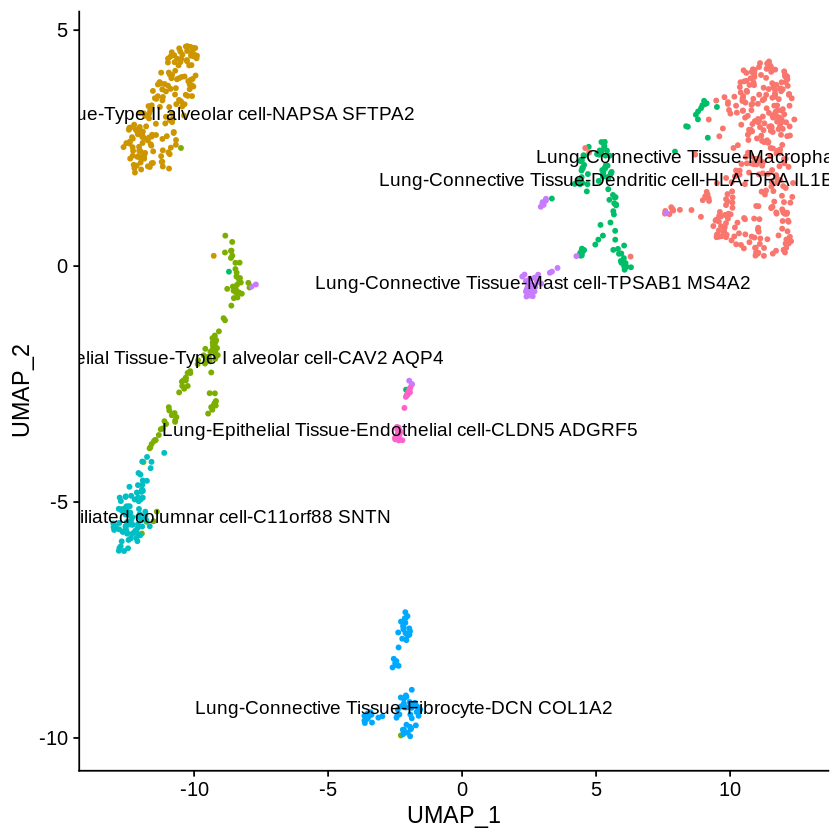

In [46]:
plot

In [6]:
dataobj@meta.data$hcad.label <- Idents(dataobj)

In [7]:
saveRDS(dataobj, file = paste0(datasetName,".seuratobj.rds"))

In [8]:
df_hca <- data.frame(rownames(dataobj@meta.data),dataobj@meta.data$hcad.label)
colnames(df_hca) <- c('cell_ID', 'cell_cluster')

In [9]:
write.table(df_hca, file = paste0(datasetName,"_annotation.hcad.tsv"), sep = "\t", quote = F, row.names = F, col.names = T)

In [47]:
ggsave(paste0(datasetName,".seurat.umap_hcad.tiff"), plot = plot, width = 8, height = 5)